In [1]:
import sqlite3

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from ast import literal_eval
from operator import itemgetter
import seaborn as sns
sns.set_context('notebook')
sns.set_style('white')

conn = sqlite3.connect('../../Data/Experiment_4/exp4_remoteData.db')
dat = pd.read_sql('SELECT * FROM subjects WHERE complete=1', con=conn)
# forgot to remove non-prolific test runs, so I'll remove rows with prolific_id is a random float
dat = dat[[pp.isalnum() for pp in dat.prolific_id.values]]


In [2]:
dat['agent'] = 'inanimate'
dat['patient'] = 'inanimate'
dat.loc[(dat.stim1 == 'anim_v1.mp4') & (dat.stim2 == 'y_p_v2.mp4'), 'agent'] = 'animate'
dat.loc[(dat.stim1 == 'anim_v1.mp4') & (dat.stim2 == 'p_y_v2.mp4'), 'patient'] = 'animate'


In [3]:
dat.loc[(dat.agent=='animate') & (dat.patient == 'inanimate'), 'condition'] = 'anim agent/phys patient'
dat.loc[(dat.agent=='inanimate') & (dat.patient == 'inanimate'), 'condition'] = 'phys agent/phys patient'
dat.loc[(dat.agent=='inanimate') & (dat.patient == 'animate'), 'condition'] = 'phys agent/anim patient'
ordering = ['anim agent/phys patient','phys agent/phys patient', 'phys agent/anim patient']

In [4]:
dat[['stim1', 'stim2', 'agent', 'patient', 'condition']]

,stim1,stim2,agent,patient,condition
4,phys_v1.mp4,y_p_v2.mp4,inanimate,inanimate,phys agent/phys patient
5,anim_v1.mp4,y_p_v2.mp4,animate,inanimate,anim agent/phys patient
6,anim_v1.mp4,p_y_v2.mp4,inanimate,animate,phys agent/anim patient
7,anim_v1.mp4,y_p_v2.mp4,animate,inanimate,anim agent/phys patient
8,phys_v1.mp4,p_y_v2.mp4,inanimate,inanimate,phys agent/phys patient
9,anim_v1.mp4,y_p_v2.mp4,animate,inanimate,anim agent/phys patient
10,phys_v1.mp4,p_y_v2.mp4,inanimate,inanimate,phys agent/phys patient
11,phys_v1.mp4,y_p_v2.mp4,inanimate,inanimate,phys agent/phys patient
12,anim_v1.mp4,y_p_v2.mp4,animate,inanimate,anim agent/phys patient
13,phys_v1.mp4,p_y_v2.mp4,inanimate,inanimate,phys agent/phys patient


In [5]:
for prompt in ['Q1', 'Q2', 'Q3', 'Q4']:
    dat[prompt] = dat[prompt].apply(lambda x: literal_eval(x)[-1])

In [6]:
# Q1:  <agent > cause the tower to fall
# Q2: <patient> caused the tower to fall
# Q3: If <Agent> had not been there, the tower would have remained standing.
# Q4: If <Patient> had not been there, the tower would have remained standing.

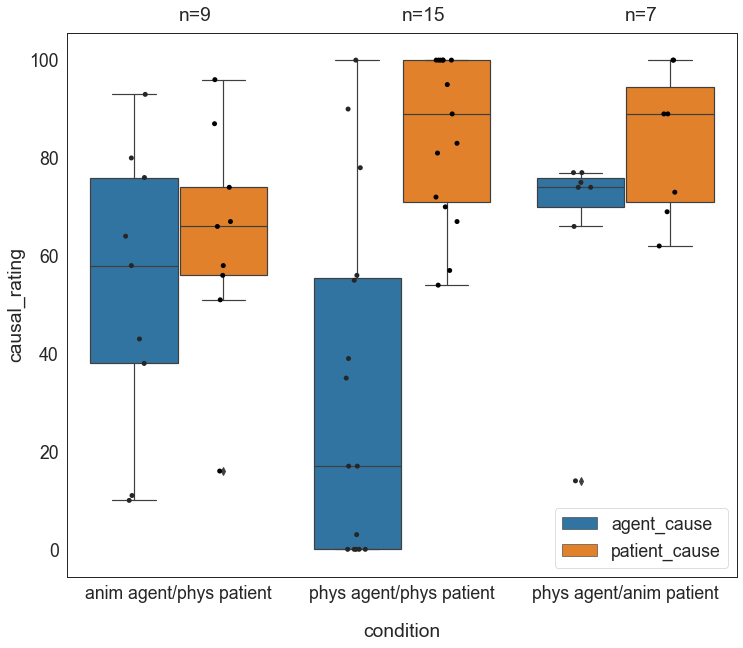

In [7]:
sns.set_context('paper', font_scale=2)
fig, ax = plt.subplots(figsize=(12,10))
xx = dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['Q1', 'Q2'], var_name='ball', value_name='causal_rating')
xx['ball'] = xx.ball.str.replace('Q1', 'agent_cause')
xx['ball'] = xx.ball.str.replace('Q2', 'patient_cause')
g = sns.boxplot(x='condition', y='causal_rating', hue='ball', data=xx, ax=ax, order=ordering)
g = sns.stripplot(x='condition', y='causal_rating', hue='ball', data=xx, ax=ax, color='k', dodge=True, order=ordering)

ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2])
ax.xaxis.labelpad = 20
ax.text(0, 108, "n="+str(len(dat.loc[dat.condition==ordering[0]])))
ax.text(1, 108, "n="+str(len(dat.loc[dat.condition==ordering[1]])))
ax.text(2, 108, "n="+str(len(dat.loc[dat.condition==ordering[2]]))
)

fig.savefig('Figures/pilot.png')

# Counterfactuals

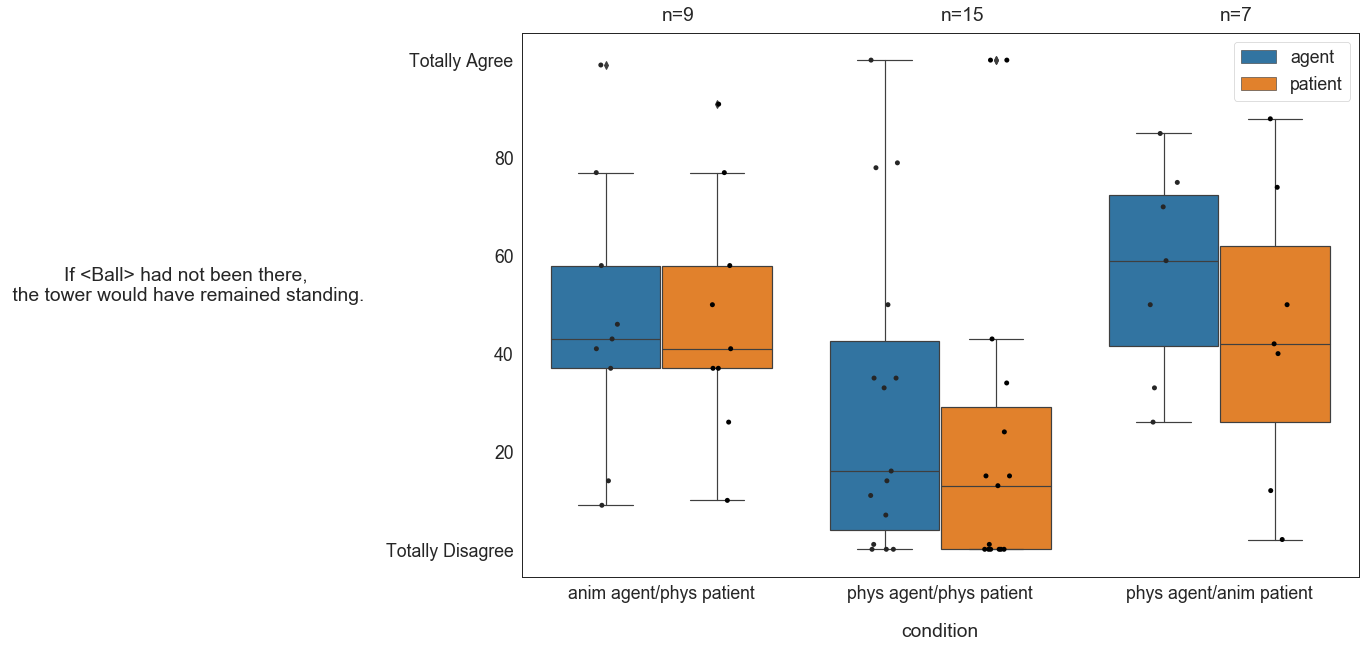

In [16]:
sns.set_context('paper', font_scale=2)
fig, ax = plt.subplots(figsize=(15,10))
xx = dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['Q3', 'Q4'], var_name='ball', value_name='cf_rating')
xx['ball'] = xx.ball.str.replace('Q3', 'agent')
xx['ball'] = xx.ball.str.replace('Q4', 'patient')
g = sns.boxplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, order=ordering)
g = sns.stripplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, color='k', dodge=True, order=ordering)

ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2])
ax.xaxis.labelpad = 20
ax.text(0, 108, "n="+str(len(dat.loc[dat.condition==ordering[0]])))
ax.text(1, 108, "n="+str(len(dat.loc[dat.condition==ordering[1]])))
ax.text(2, 108, "n="+str(len(dat.loc[dat.condition==ordering[2]]))
)

ax.set_ylabel("If <Ball> had not been there,\n the tower would have remained standing.", rotation=0, labelpad=200)
ax.set_yticklabels(['0', 'Totally Disagree', '20', '40', '60', '80', 'Totally Agree'])
plt.savefig('Figures/pilot_cf.png', bbox_inches='tight')

Text(0, 0.5, 'If <Ball> had not been there,\n the tower would have remained standing.')

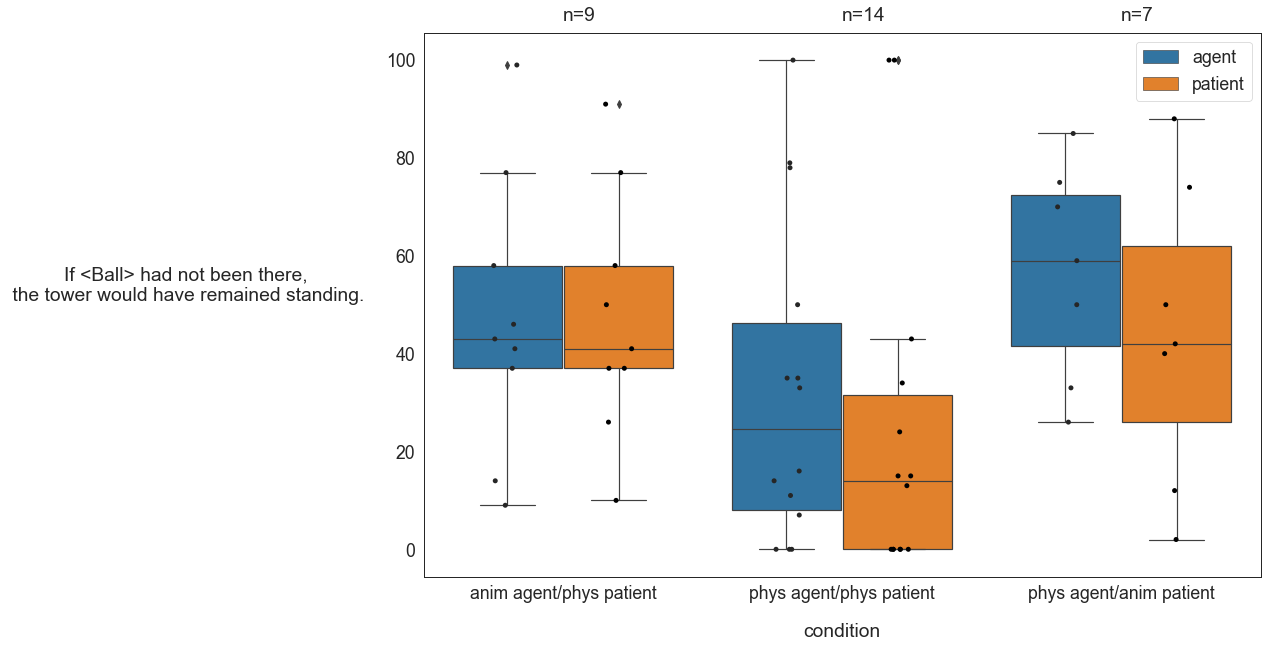

In [76]:
sns.set_context('paper', font_scale=2)
fig, ax = plt.subplots(figsize=(15,10))
xx = dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['Q3', 'Q4'], var_name='ball', value_name='cf_rating')
xx['ball'] = xx.ball.str.replace('Q3', 'agent')
xx['ball'] = xx.ball.str.replace('Q4', 'patient')
g = sns.boxplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, order=ordering)
g = sns.stripplot(x='condition', y='cf_rating', hue='ball', data=xx, ax=ax, color='k', dodge=True, order=ordering)

ax.legend(g.get_legend_handles_labels()[0][:2], g.get_legend_handles_labels()[1][:2])
ax.xaxis.labelpad = 20
ax.text(0, 108, "n="+str(len(dat.loc[dat.condition==ordering[0]])))
ax.text(1, 108, "n="+str(len(dat.loc[dat.condition==ordering[1]])))
ax.text(2, 108, "n="+str(len(dat.loc[dat.condition==ordering[2]]))
)

ax.set_ylabel("If <Ball> had not been there,\n the tower would have remained standing.", rotation=0, labelpad=200)
#ax.set_yticklabels(['0', 'Totally Disagree', '20', '40', '60', '80', 'Totally Agree'])
#fig.savefig('Figures/pilot_cf.png')

In [9]:
xx = dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['Q1', 'Q2',], var_name='ball', value_name='cause_rating')
xx['ball'] = xx.ball.str.replace('Q1', 'agent')
xx['ball'] = xx.ball.str.replace('Q2', 'patient')
yy = dat.melt(id_vars=['agent', 'patient', 'condition'], value_vars=['Q3', 'Q4',], var_name='ball', value_name='cf_rating')
yy['ball'] = yy.ball.str.replace('Q3', 'agent')
yy['ball'] = yy.ball.str.replace('Q4', 'patient')
xx['cf_rating'] = yy.cf_rating
xx

,agent,patient,condition,ball,cause_rating,cf_rating
0,inanimate,inanimate,phys agent/phys patient,agent,0,0
1,animate,inanimate,anim agent/phys patient,agent,11,9
2,inanimate,animate,phys agent/anim patient,agent,74,75
3,animate,inanimate,anim agent/phys patient,agent,76,77
4,inanimate,inanimate,phys agent/phys patient,agent,90,11
...,...,...,...,...,...,...
57,inanimate,animate,phys agent/anim patient,patient,100,50
58,animate,inanimate,anim agent/phys patient,patient,66,50
59,inanimate,inanimate,phys agent/phys patient,patient,83,43
60,inanimate,inanimate,phys agent/phys patient,patient,57,15


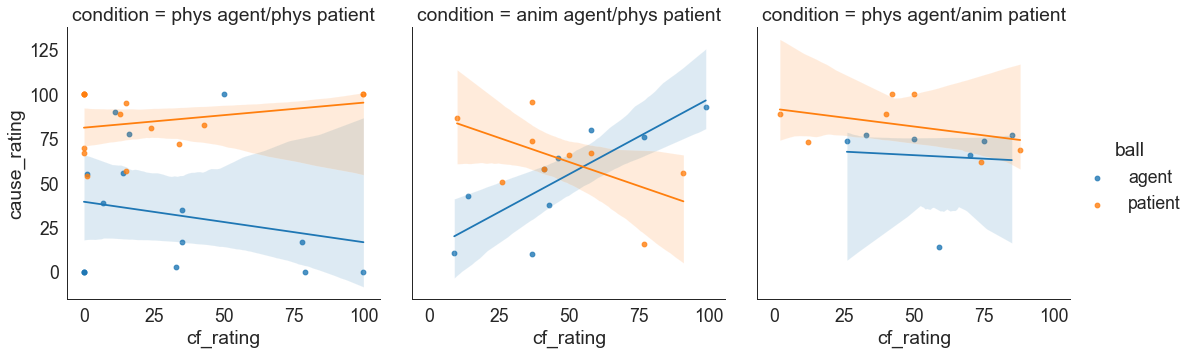

In [12]:
#fig, ax = plt.subplots(figsize=(15,10))

g = sns.lmplot(x='cf_rating', y='cause_rating', hue='ball', col='condition', data=xx)
g.fig.savefig('Figures/cause_cf_pilot.png')

In [97]:
sns.relplot(x=)

(60, 10)